Using clustering for image segmentation

Image segmentation, the theme of our project, is a process by which an image is segmented into varying portions or regions based on object or , as in the case of this project, color. Say you've a a picture of a crowd of sports fans and wish to highlight the portion of fans wearing hats, or holding signs supporting the their team. Maybe you've a lot of cars you need to go through and wish to select the blue ones, ignoring all others. Image segmentation makes this possible. We will be using the Kmeans method to accomplish this.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("quad.jpg")

#The image, unedited, is coming out a bit strange. Nonetheless,  the colors seen below will do fine for the purposes of this project. 

In [3]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#flattens our image into a 2d array of pixels
pixel_reshape = image.reshape((-1, 3))
pixel_reshape = np.float32(pixel_reshape)
print(pixel_reshape.shape)


(277440, 3)


In [46]:

#This will aid with processing speed
limit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)


#in cases of photos especially, it is fair to arbitrarily set the numbee of clusters just by looking at the photo you are processing and determininmg how many colors are contained within, roundabout. We wil cluster into 3 regions to be fair.  

k = 3


_, labels, (centers) = cv2.kmeans(pixel_reshape, k, None, limit, 10, cv2.KMEANS_RANDOM_CENTERS)


centers = np.uint8(centers)
labels = labels.flatten()

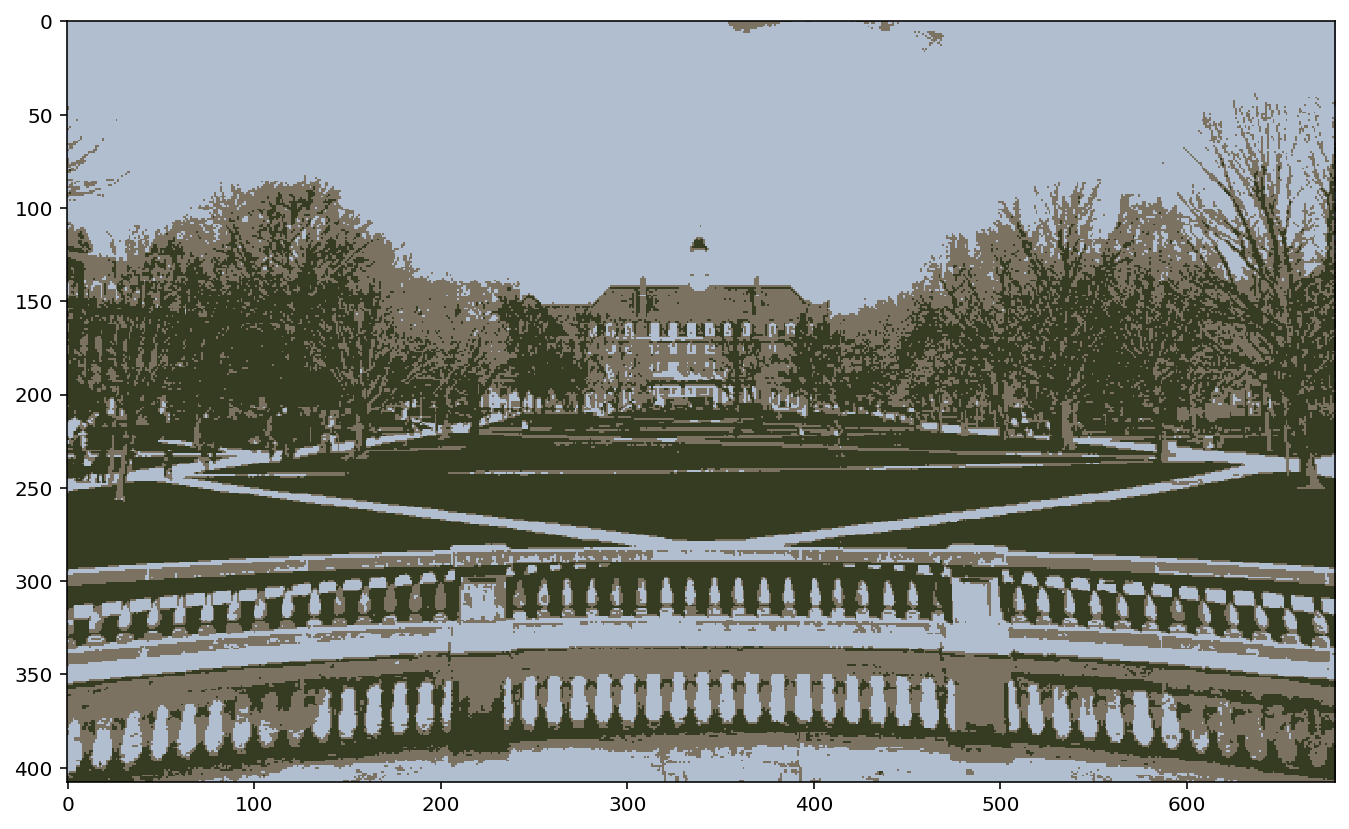

In [45]:
#now begins the process of creating our segmented image , which in this case is a picture of the main quad. 
centers = np.uint8(centers)
labels = labels.flatten()
modded_img = centers[labels.flatten()]
# reversion to the image's original dimensions
modded_img = modded_img.reshape(image.shape)
# tada
plt.imshow(modded_img)
plt.show()

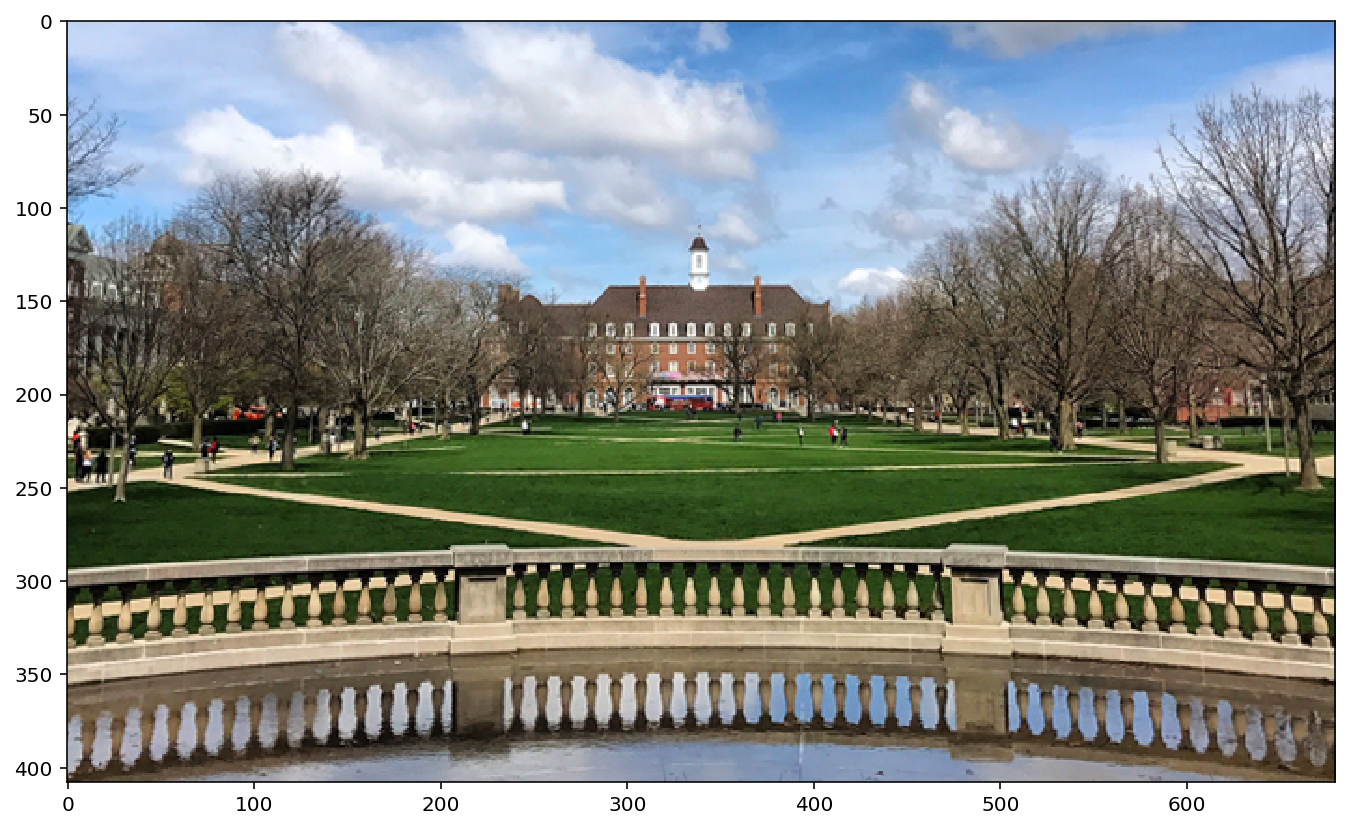

In [42]:
#here we will exhihit  the  same image, in its original form,  with a whopping  11.5 clusters this time around
original = np.copy(image)
original = original.reshape((-1, 3))
cluster = 11.5

original[labels == cluster] = [0, 0, 0]
original = original.reshape(image.shape)
plt.imshow(original)
plt.show()

#Conclusion: Our attempt at segmentation was succesful. At the end of the day, image segmentation is applicable in many areas. Be it facial recognition or the  processing of busy (full of various objects) images, image segmentation is an effective means of "sorting through the fluff" and obtaining the pieces we want, allowing humans to leave the irritating  task of playing "hidden pictures" to our computers and their computer vision. It is truly a marvel of computer science.

#sources:  thepythoncode.com